### What is Sentiment Analysis?

Sentiment analysis (also known as opinion mining) is one of the many applications of Natural Language Processing. It is a set of methods and techniques used for extracting subjective information from text or speech, such as opinions or attitudes. In simple terms, it involves classifying a piece of text as **positive, negative or neutral.**

### TWITTER SENTIMENT ANALYSIS 

**The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.**

*Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist, your objective is to predict the labels on the given test dataset.*


# LIST OF PROCESS

1. Understand the Problem Statement
2. Tweets Preprocessing and Cleaning
    Data Inspection
    Data Cleaning
3. Story Generation and Visualization from Tweets
4. Extracting Features from Cleaned Tweets
    Bag-of-Words
    TF-IDF
    Word Embeddings
5. Model Building: Sentiment Analysis
    Logistic Regression
    Support Vector Machine
    RandomForest
    XGBoost
6. Model Fine-tuning
7. Summary

##### importing a ll the libraries needed in this course

In [3]:
import re      #regular expression
import nltk    #text manipulation
import string
import warnings

In [4]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
train = pd.read_csv('train_E6oV3lV.csv')

In [8]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [9]:
test=pd.read_csv('test_tweets_anuFYb8.csv')
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [10]:
#now checking the non racist/sexist tweets.
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [11]:
#now checking the racist/sexist tweets.
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
id       17197 non-null int64
tweet    17197 non-null object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [14]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

#### n the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 29,720 (~93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

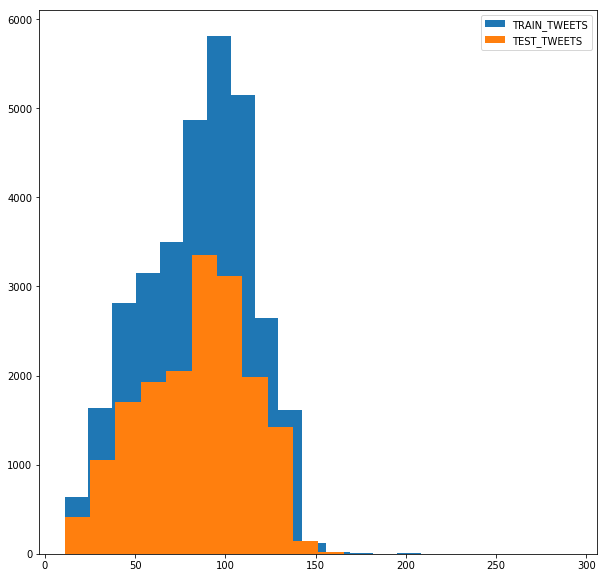

In [13]:
length_train = train['tweet'].str.len()
length_test =test['tweet'].str.len()
plt.figure(figsize=(10,10))
plt.hist(length_train,bins=20,label="TRAIN_TWEETS")
plt.hist(length_test,bins=20,label="TEST_TWEETS")
plt.legend()

## DATA CLEANING 

*In any natural language processing task, cleaning raw text data is an important step. It helps in getting rid of the unwanted words and characters which helps in obtaining better features. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.*

Before we begin cleaning, let’s first combine train and test datasets. Combining the datasets will make it convenient for us to preprocess the data. Later we will split it back into train and test data.

In [15]:
combi= train.append(test, ignore_index=True)
combi.shape

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(49159, 3)

In [16]:
combi.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze #newmusic #newsong"


In [17]:
combi.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation


In [18]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    
    for i in r:
        input_txt=re.sub(i,'',input_txt)
        
    return input_txt

1. We will remove the twitter handles as they are already masked as @user due to privacy concerns. These twitter handles hardly give any information about the nature of the tweet.

2. We will also get rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different types of tweets.

3. Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data. 

4. Lastly, we will normalize the text data. For example, reducing terms like loves, loving, and lovable to their base word, i.e., ‘love’.are often used in the same context. If we can reduce them to their root word, which is ‘love’. It will help in reducing the total number of unique words in our data without losing a significant amount of information.



In [19]:
#Removing the some unrelavant patterns.
combi['clean_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [20]:
#Removing punctuation and special character.
combi['clean_tweet'] = combi['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(5)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [21]:
#removing short words
combi['clean_tweet']=combi['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [21]:
combi.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [22]:
#text normalisation i.e tokenisation

tokenised_tweet=combi['clean_tweet'].apply(lambda x: x.split()) #tokenising

tokenised_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [23]:
#stemming the data frame

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

tokenised_tweet = tokenised_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

In [24]:
tokenised_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [25]:
for i in range(len(tokenised_tweet)):
    tokenised_tweet[i]= ' '.join(tokenised_tweet[i])

combi['clean_tweet']=tokenised_tweet
combi.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [26]:
all_words=' '.join([text for text in combi['clean_tweet']])

In [27]:
type(all_words)

str

In [28]:
def hashtag_extract(x):
    hashtags=[]
    
    for i in x:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)
        
    return hashtags

In [29]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['clean_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['clean_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [30]:
HT_negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

### Bag-of-Words Features

To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings. Read on to understand these techniques in detail.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [1]:
import gensim

C:\Users\user\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [30]:
bow_vectorizer= CountVectorizer(max_df=0.90,min_df=2,max_features=1000, stop_words='english')

In [31]:
bow=bow_vectorizer.fit_transform(combi['clean_tweet'])
bow.shape

(49159, 1000)

### TF-IDF FEATURES

This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)

IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

TF-IDF = TF*IDF

In [32]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(combi['clean_tweet'])
tfidf.shape

(49159, 1000)

### Word2Vec Features

Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are able to achieve tasks like King -man +woman = Queen, which is mind-blowing.

The advantages of using word embeddings over BOW or TF-IDF are:

Dimensionality reduction - significant reduction in the no. of features required to build a model.

It capture meanings of the words, semantic relationships and the different types of contexts they are used in.



1. Word2Vec Embeddings

Word2Vec is not a single algorithm but a combination of two techniques – CBOW (Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

CBOW tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words. The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.

Below is a diagrammatic representation of a 1-word context window Word2Vec model.

There are three laters: - an input layer, - a hidden layer, and - an output layer.

The input layer and the output, both are one- hot encoded of size [1 X V], where V is the size of the vocabulary (no. of unique words in the corpus). The output layer is a softmax layer which is used to sum the probabilities obtained in the output layer to 1. The weights learned by the model are then used as the word-vectors.

We will go ahead with the Skip-gram model as it has the following advantages:

It can capture two semantics for a single word. i.e it will have two vector representations of ‘apple’. One for the company Apple and the other for the fruit.

Skip-gram with negative sub-sampling outperforms CBOW generally.

We will train a Word2Vec model on our data to obtain vector representations for all the unique words present in our corpus. There is one more option of using pre-trained word vectors instead of training our own model. Some of the freely available pre-trained vectors are:

Google News Word Vectors

Freebase names

DBPedia vectors (wiki2vec)

However, for this course, we will train our own word vectors since size of the pre-trained word vectors is generally huge.

Let’s train a Word2Vec model on our corpus.

In [35]:
tokenised_tweet=combi['clean_tweet'].apply(lambda x:x.split())  #tokenising

model_w2v = gensim.models.Word2Vec(tokenised_tweet,
                                   size=200,window=5,
                                   min_count=2,
                                   sg=1,hs=0,
                                   negative = 10,
                                   workers=2,
                                   seed=34)

In [36]:
model_w2v.train(tokenised_tweet,total_examples=len(combi['clean_tweet']), epochs=20)

(6510028, 7536020)

In [37]:
model_w2v.wv.most_similar(positive="dinner")

[('#avocado', 0.5692059993743896),
 ('spaghetti', 0.5542505383491516),
 ('#biall', 0.5492165088653564),
 ('noodl', 0.5449492335319519),
 ('spinach', 0.5421799421310425),
 ('#cellar', 0.5404863357543945),
 ('fav', 0.5389478206634521),
 ('#foodcoma', 0.5381564497947693),
 ('gown', 0.5340957641601562),
 ('melani', 0.5318136811256409)]

In [38]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.5799493193626404),
 ('hillari', 0.5568557977676392),
 ('#delegaterevolt', 0.5507090091705322),
 ('phoni', 0.5460106730461121),
 ('melo', 0.5383720993995667),
 ('unstabl', 0.535161018371582),
 ('unfit', 0.5276557803153992),
 ('potu', 0.5272142291069031),
 ('unfavor', 0.5262462496757507),
 ('tomlin', 0.5259177684783936)]

In [39]:
model_w2v['food']

array([ 4.62608188e-01,  2.48423859e-01, -7.08294332e-01,  8.57705399e-02,
        1.84939116e-01,  1.09273434e-01, -7.87009358e-01, -8.23521197e-01,
        1.26449227e-01, -1.08273797e-01, -2.82545358e-01,  4.92597610e-01,
        3.29690248e-01, -2.39153713e-01, -4.54828680e-01, -2.48200297e-01,
        2.47347355e-01, -4.77400631e-01,  2.30348036e-01,  3.65880318e-02,
        9.27214995e-02,  1.39443457e-01, -2.52912283e-01, -4.05685961e-01,
        3.83564830e-02,  4.81887758e-01, -4.30327535e-01, -2.67151237e-01,
       -3.22860986e-01,  1.57529294e-01, -8.04295838e-01,  1.04644112e-01,
       -6.44200146e-01, -1.36454012e-02, -7.02199459e-01, -2.53120273e-01,
        1.94056213e-01, -3.54082048e-01,  3.23402435e-02, -8.07973742e-02,
       -4.12961572e-01,  3.19373727e-01,  2.18985662e-01, -3.07605714e-01,
        1.69458449e-01, -2.84347057e-01, -2.84515251e-03, -6.48328006e-01,
        1.91913638e-02, -6.63313150e-01, -9.85069647e-02, -9.04995739e-01,
        8.01590204e-01, -

In [40]:
len(model_w2v['food'])

200

**Preparing Vectors for Tweets**

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [41]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [44]:
wordvec_arrays = np.zeros((len(tokenised_tweet), 200))

for i in range(len(tokenised_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenised_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)